# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | kapuskasing
Processing Record 7 of Set 1 | bijar
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | along
Processing Record 10 of Set 1 | kristiansund
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | tazacorte
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | aykhal
Processing Record 17 of Set 1 | edmundston
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | murzuq
Processing Record 20 of Set 1 | crane
Processing Record 21 of Set 1 | santa cruz de la palma
Processing Record 22 of Set 1 | u

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          604
Lat           604
Lng           604
Max Temp      604
Humidity      604
Cloudiness    604
Wind Speed    604
Country       604
Date          604
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,22.32,78,20,4.63,US,1722507095
1,jamestown,42.0970,-79.2353,19.88,99,100,2.06,US,1722507067
2,hermanus,-34.4187,19.2345,16.56,57,0,0.93,ZA,1722507097
3,puerto natales,-51.7236,-72.4875,1.25,98,100,0.56,CL,1722507098
4,kodiak,57.7900,-152.4072,8.73,81,0,3.09,US,1722507099


In [2]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [3]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,22.32,78,20,4.63,US,1722507095
1,jamestown,42.0970,-79.2353,19.88,99,100,2.06,US,1722507067
2,hermanus,-34.4187,19.2345,16.56,57,0,0.93,ZA,1722507097
3,puerto natales,-51.7236,-72.4875,1.25,98,100,0.56,CL,1722507098
4,kodiak,57.7900,-152.4072,8.73,81,0,3.09,US,1722507099


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

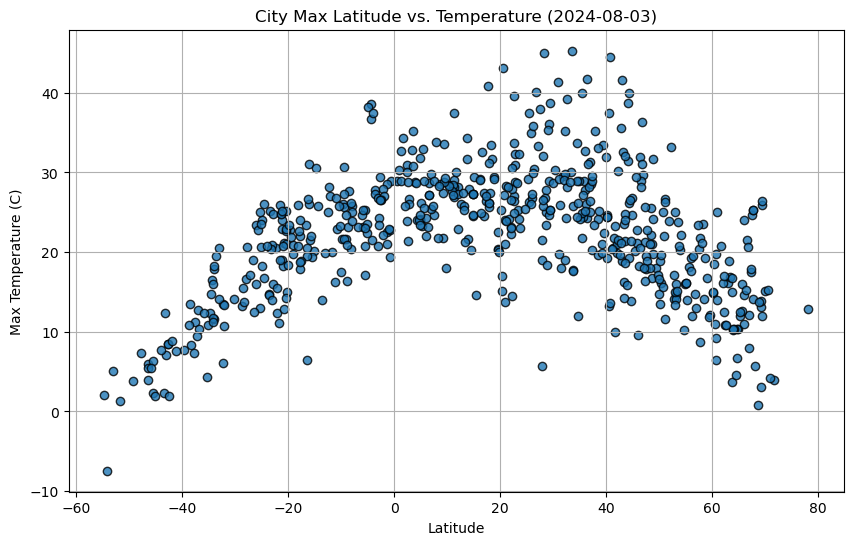

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({pd.to_datetime('today').strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

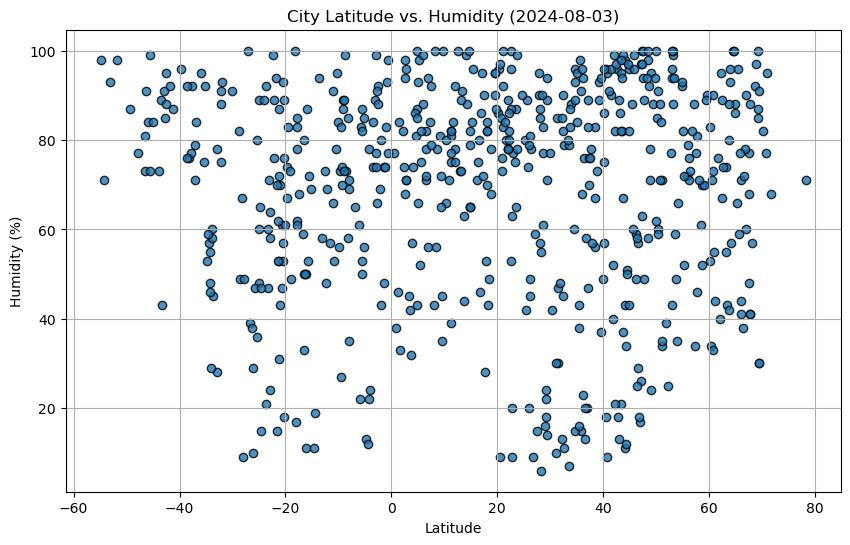

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({pd.to_datetime('today').strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")


# Show plot
plt.show()




#### Latitude Vs. Cloudiness

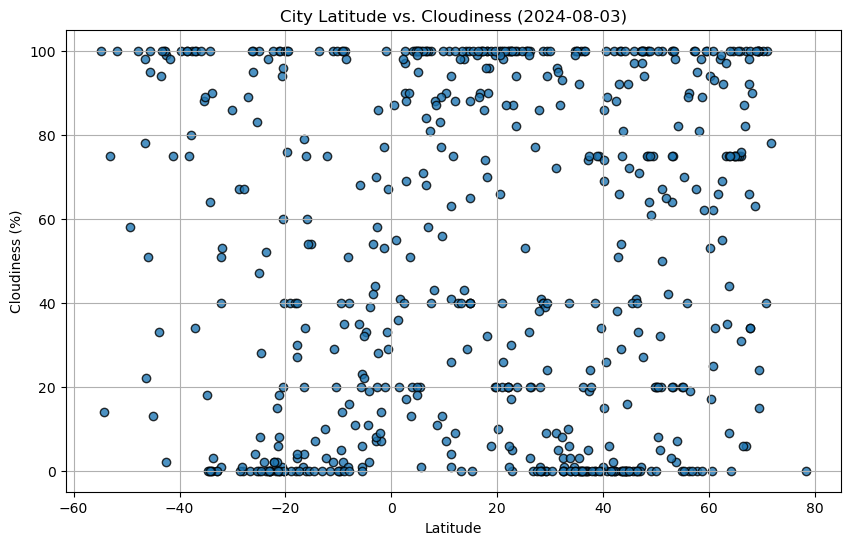

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({pd.to_datetime('today').strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

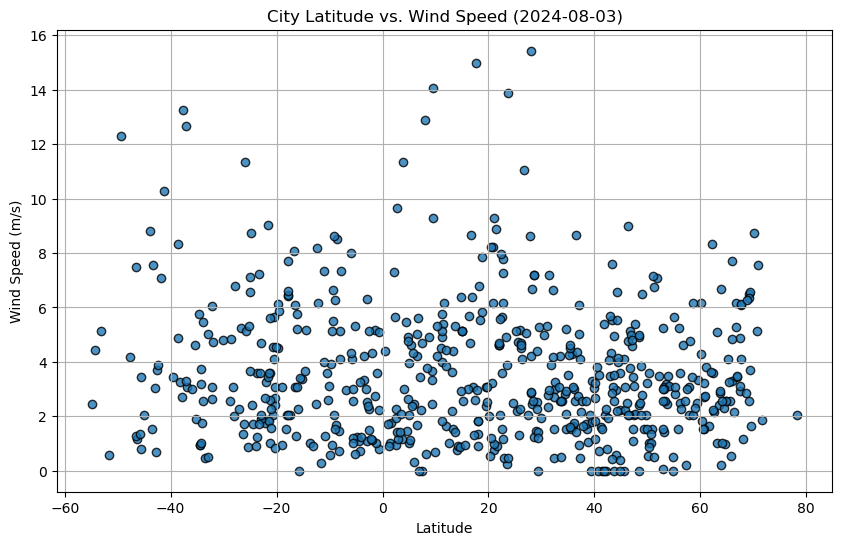

In [10]:
# Build scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({pd.to_datetime('today').strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [11]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.savefig(save_path)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,22.32,78,20,4.63,US,1722507095
1,jamestown,42.0970,-79.2353,19.88,99,100,2.06,US,1722507067
4,kodiak,57.7900,-152.4072,8.73,81,0,3.09,US,1722507099
5,kapuskasing,49.4169,-82.4331,18.05,88,75,1.54,CA,1722507007
6,bijar,35.8668,47.6051,28.90,15,0,1.62,IR,1722506872


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hermanus,-34.4187,19.2345,16.56,57,0,0.93,ZA,1722507097
3,puerto natales,-51.7236,-72.4875,1.25,98,100,0.56,CL,1722507098
7,blackmans bay,-43.0167,147.3167,7.07,91,100,3.03,AU,1722507102
10,port-aux-francais,-49.3500,70.2167,3.80,87,58,12.28,TF,1722507105
12,margaret river,-33.9500,115.0667,11.66,58,90,5.45,AU,1722507107


###  Temperature vs. Latitude Linear Regression Plot

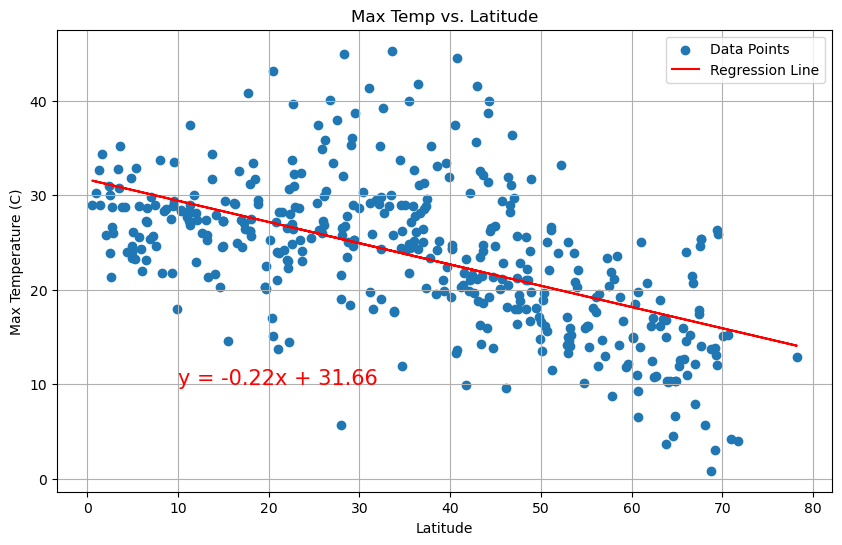

In [29]:
#Northern Hemisphere

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Perform linear regression on the relevant columns
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, (10, 10), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Max Temp vs. Latitude')
plt.legend()
plt.grid(True)
plt.show()

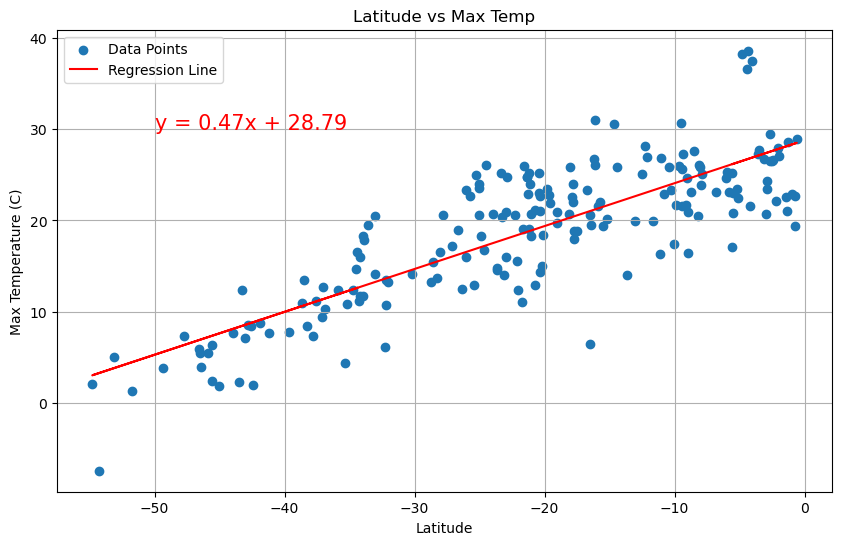

In [30]:
# Southern Hemisphere

# Perform linear regression on the relevant columns
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, (-50, 30), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Latitude vs Max Temp')
plt.legend()
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** 
In both the Northern and Southern Hemispheres, latitude has a big effect on maximum temperature, which makes sense because of how climate zones work. But, the scatter around the regression lines shows that other things like altitude, how close you are to the ocean, and local weather patterns also affect temperatures. These extra factors can cause temperatures to be different from what we would expect just based on latitude alone.

### Humidity vs. Latitude Linear Regression Plot

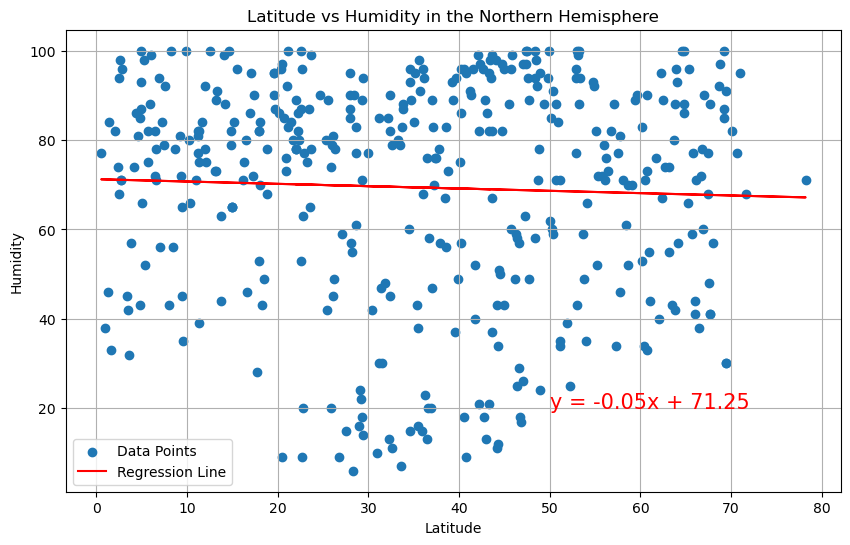

In [31]:
#Northern Hemisphere

# Perform linear regression on the relevant columns
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, (50, 20), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity in the Northern Hemisphere')
plt.legend()
plt.grid(True)
plt.show()

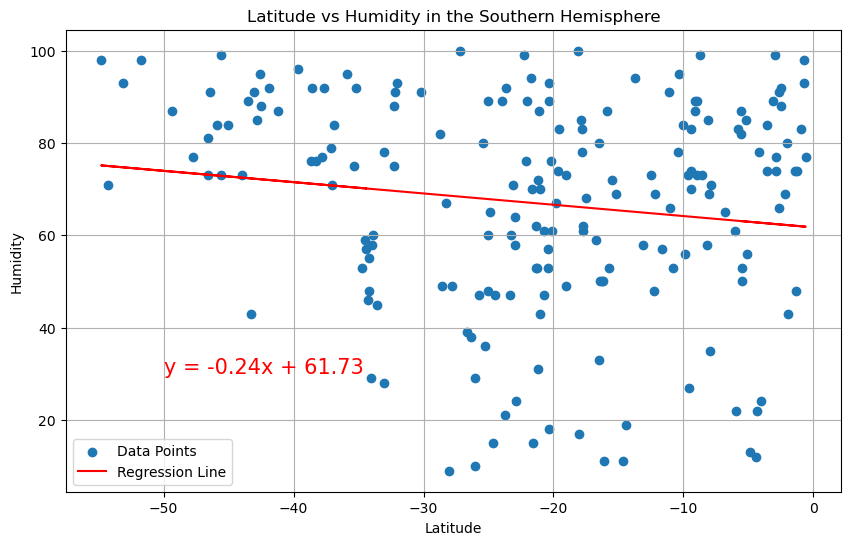

In [32]:
#Southern Hemisphere

# Perform linear regression on the relevant columns
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, (-50, 30), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity in the Southern Hemisphere')
plt.legend()
plt.grid(True)
plt.show()

**Discussion about the linear relationship:**  In both hemispheres, the correlation between latitude and humidity isn't very strong. The wide spread data points around the regression lines indicates that other factors, like elevation, local climate conditions, and weather patterns, have a much bigger impact on humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

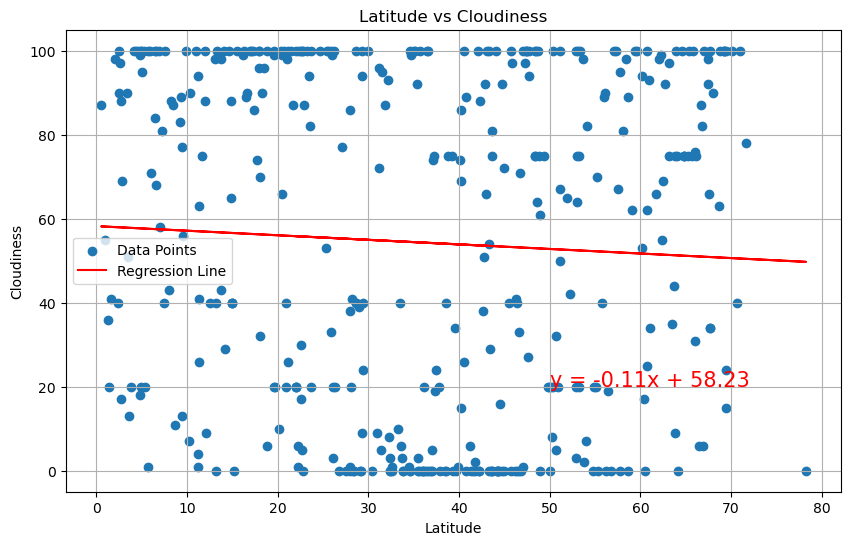

In [33]:
#Northern Hemisphere

# Perform linear regression on the relevant columns
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, (50, 20), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.legend()
plt.grid(True)
plt.show()

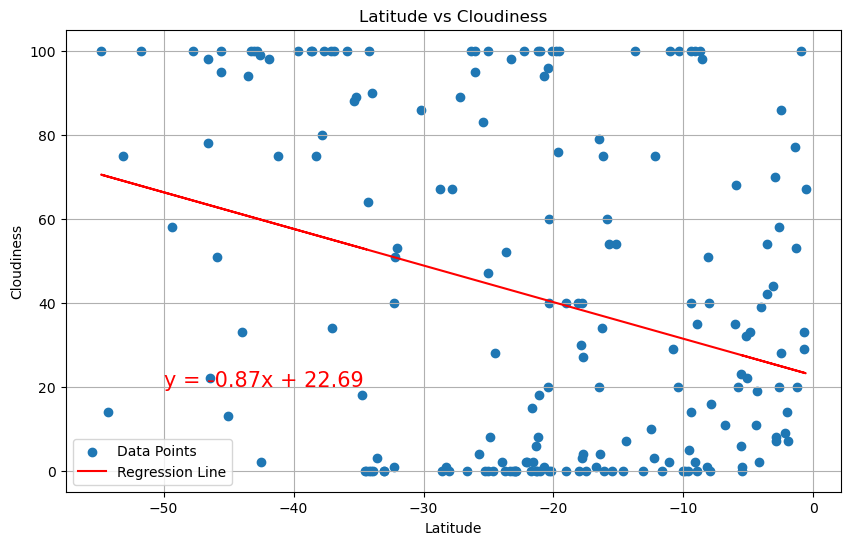

In [35]:
#Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, (-50, 20), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.legend()
plt.grid(True)
plt.show()

**Discussion about the linear relationship:**  In both hemispheres, the connection between latitude and cloudiness is pretty weak.
 The big scatter around the regression lines shows that many other factors, for example elevation, local climate conditions, and weather patterns, have a much bigger impact on cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

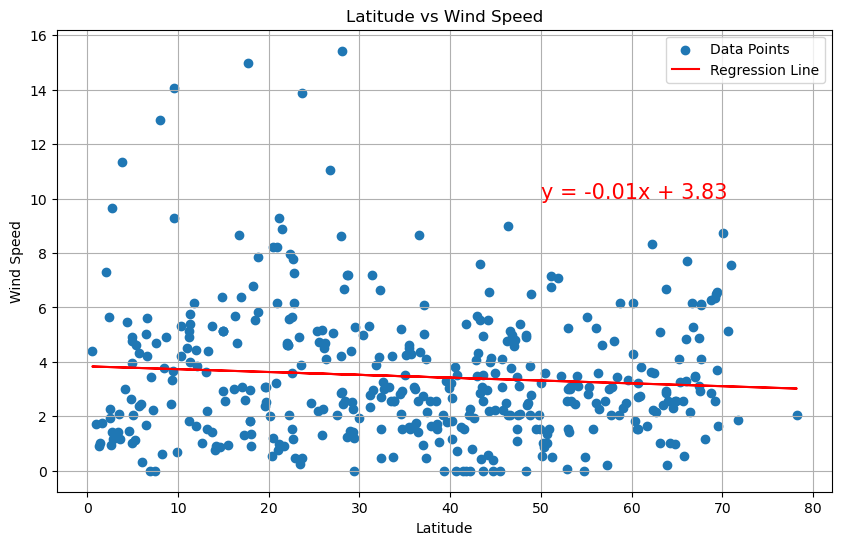

In [39]:
#Nothern Hemisphere

# Perform linear regression on the relevant columns
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, (50, 10), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
plt.legend()
plt.grid(True)
plt.show()

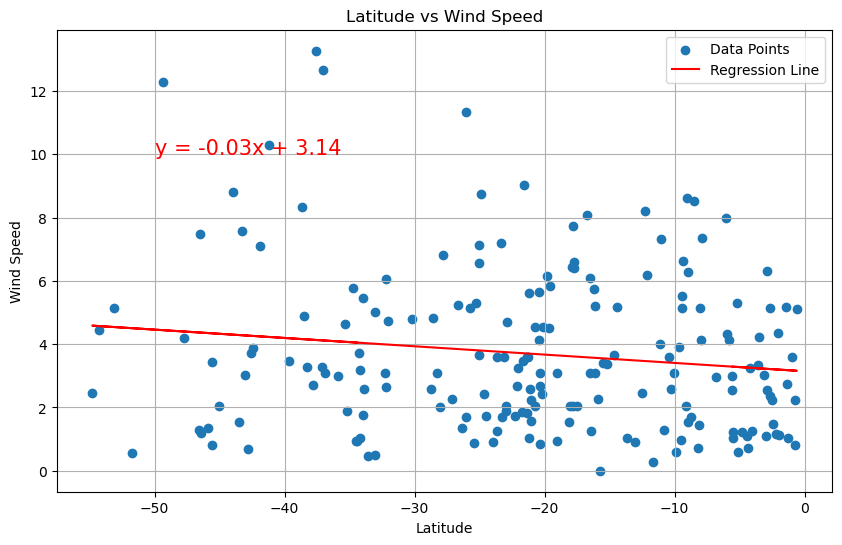

In [40]:
#Southern Hemisphere

# Perform linear regression on the relevant columns
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Data Points')
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, (-50, 10), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
plt.legend()
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** In both hemispheres, the correlation between latitude and wind speed is really weak. Thie latitude doesn't have much effect on wind speed.
The big scatter around the regression lines shows that factors like local geography, atmospheric conditions, and weather patterns. There's a very slight trend of wind speed decreasing as you move further from the equator in both hemispheres, but this trend isn't strong enough.